# Customer Churn Prediction

Customer churn refers to the phenomenon where customers stop doing business with a company or cancel a service over a specific period. It is a critical metric for businesses, as high churn rates can lead to lost revenue and increased costs for acquiring new customers. Churn can occur for various reasons, including poor customer service, dissatisfaction with the product or service, better offers from competitors, or changes in customer needs. Reducing churn is a key focus for many businesses, and companies often use predictive models to identify at-risk customers and take proactive measures to retain them.

Customer churn prediction involves using machine learning algorithms to identify customers who are likely to leave a service or business. By analyzing historical data, such as customer demographics, usage patterns, and payment behaviors, models can predict which customers are at risk of churn. These predictions enable businesses to take proactive actions, such as offering personalized incentives or improving customer experiences, to retain valuable customers and reduce churn rates. Common techniques for churn prediction include logistic regression, decision trees, and ensemble methods like random forests or gradient boosting.

##  Importing Libraries and Dataset

Firstly we have to import libraries : 
* Pandas – To load the Dataframe
* Matplotlib – To visualize the data features i.e. barplot
* Seaborn – To see the correlation between features using heatmap

In [1]:
# importing libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the dataset
df=pd.read_csv("C:/Users/USER/Desktop/rene/Telco-Customer-Churn-dataset-cleaned.csv")
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure-binned,MonthlyCharges-binned,TotalCharges-binned,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,Low,Low,Low,0.0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,One year,No,Mailed check,56.95,1889.50,Medium,Medium,Low,0.0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Low,Medium,Low,1.0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,Medium,Low,Low,0.0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Low,Medium,Low,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,One year,Yes,Mailed check,84.80,1990.50,Low,Medium,Low,0.0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,High,High,High,0.0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,Month-to-month,Yes,Electronic check,29.60,346.45,Low,Low,Low,0.0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,Month-to-month,Yes,Mailed check,74.40,306.60,Low,Medium,Low,1.0


In [3]:
# top 10 data
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure-binned,MonthlyCharges-binned,TotalCharges-binned,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,Low,Low,Low,0.0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,One year,No,Mailed check,56.95,1889.50,Medium,Medium,Low,0.0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Low,Medium,Low,1.0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,Medium,Low,Low,0.0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Low,Medium,Low,1.0
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Low,High,Low,1.0
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,...,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,Low,High,Low,0.0
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,...,No,Month-to-month,No,Mailed check,29.75,301.90,Low,Low,Low,0.0
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Medium,High,Medium,1.0
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,...,No,One year,No,Bank transfer (automatic),56.15,3487.95,High,Medium,Medium,0.0


In [4]:
# bottom 10 data
df.tail(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure-binned,MonthlyCharges-binned,TotalCharges-binned,Churn
7033,Male,0,No,No,38,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,Medium,Medium,Low,0.0
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,...,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,High,High,High,1.0
7035,Male,0,No,No,19,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.10,Low,Medium,Low,0.0
7036,Female,0,No,No,12,No,No phone service,DSL,No,Yes,...,Yes,One year,No,Electronic check,60.65,743.30,Low,Medium,Low,0.0
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,...,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,High,Low,Low,0.0
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,One year,Yes,Mailed check,84.80,1990.50,Low,Medium,Low,0.0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,High,High,High,0.0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,Month-to-month,Yes,Electronic check,29.60,346.45,Low,Low,Low,0.0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,Month-to-month,Yes,Mailed check,74.40,306.60,Low,Medium,Low,1.0
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,...,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,High,High,High,0.0


### EDA( Exploratory Data Analysis )

In [5]:
# getting information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7043 non-null   object 
 1   SeniorCitizen          7043 non-null   int64  
 2   Partner                7043 non-null   object 
 3   Dependents             7043 non-null   object 
 4   tenure                 7043 non-null   int64  
 5   PhoneService           7043 non-null   object 
 6   MultipleLines          7043 non-null   object 
 7   InternetService        7043 non-null   object 
 8   OnlineSecurity         7043 non-null   object 
 9   OnlineBackup           7043 non-null   object 
 10  DeviceProtection       7043 non-null   object 
 11  TechSupport            7043 non-null   object 
 12  StreamingTV            7043 non-null   object 
 13  StreamingMovies        7043 non-null   object 
 14  Contract               7043 non-null   object 
 15  Pape

In [6]:
# describing the dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370
std,0.368612,24.559481,30.090047,2266.794470,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [7]:
# columns of the dataset
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'tenure-binned',
       'MonthlyCharges-binned', 'TotalCharges-binned', 'Churn'],
      dtype='object')

In [8]:
# shape of the dataset
df.shape

(7043, 23)

In [9]:
# finding null values
df.isnull().sum()

gender                   0
SeniorCitizen            0
Partner                  0
Dependents               0
tenure                   0
PhoneService             0
MultipleLines            0
InternetService          0
OnlineSecurity           0
OnlineBackup             0
DeviceProtection         0
TechSupport              0
StreamingTV              0
StreamingMovies          0
Contract                 0
PaperlessBilling         0
PaymentMethod            0
MonthlyCharges           0
TotalCharges             0
tenure-binned            0
MonthlyCharges-binned    0
TotalCharges-binned      0
Churn                    0
dtype: int64

###  Label Encoding

In [10]:
# encoding the object type into numerical value
from sklearn import preprocessing 
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
obj = (df.dtypes == 'object') 
for col in list(obj[obj].index): 
    df[col] = label_encoder.fit_transform(df[col])
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure-binned,MonthlyCharges-binned,TotalCharges-binned,Churn
0,0,0,1,0,1,0,1,0,0,2,...,0,0,1,2,29.85,29.85,1,1,1,0.0
1,1,0,0,0,34,1,0,0,2,0,...,0,1,0,3,56.95,1889.50,2,2,1,0.0
2,1,0,0,0,2,1,0,0,2,2,...,0,0,1,3,53.85,108.15,1,2,1,1.0
3,1,0,0,0,45,0,1,0,2,0,...,0,1,0,0,42.30,1840.75,2,1,1,0.0
4,0,0,0,0,2,1,0,1,0,0,...,0,0,1,2,70.70,151.65,1,2,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,...,2,1,1,3,84.80,1990.50,1,2,1,0.0
7039,0,0,1,1,72,1,2,1,0,2,...,2,1,1,1,103.20,7362.90,0,0,0,0.0
7040,0,0,1,1,11,0,1,0,2,0,...,0,0,1,2,29.60,346.45,1,1,1,0.0
7041,1,1,1,0,4,1,2,1,0,0,...,0,0,1,3,74.40,306.60,1,2,1,1.0


In [11]:
# checking information to know the object elements convert into numerical value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7043 non-null   int32  
 1   SeniorCitizen          7043 non-null   int64  
 2   Partner                7043 non-null   int32  
 3   Dependents             7043 non-null   int32  
 4   tenure                 7043 non-null   int64  
 5   PhoneService           7043 non-null   int32  
 6   MultipleLines          7043 non-null   int32  
 7   InternetService        7043 non-null   int32  
 8   OnlineSecurity         7043 non-null   int32  
 9   OnlineBackup           7043 non-null   int32  
 10  DeviceProtection       7043 non-null   int32  
 11  TechSupport            7043 non-null   int32  
 12  StreamingTV            7043 non-null   int32  
 13  StreamingMovies        7043 non-null   int32  
 14  Contract               7043 non-null   int32  
 15  Pape

In [12]:
# correlation of the dataset
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure-binned,MonthlyCharges-binned,TotalCharges-binned,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,...,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.000080,-0.012970,-0.007522,0.004189,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,...,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.103006,0.006623,-0.086638,0.017672,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,...,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.317504,-0.182993,-0.089544,-0.004502,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,...,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.062078,-0.063839,0.013190,0.010653,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,...,0.296866,0.671607,0.006152,-0.370436,0.247900,0.826178,-0.494417,-0.215541,0.023971,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,...,0.043870,0.002247,0.016505,-0.004184,0.247398,0.113214,-0.015386,-0.071624,-0.053742,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,...,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452577,-0.162449,-0.257832,-0.028733,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,...,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175755,0.015521,-0.286777,-0.152309,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,...,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.253224,-0.170652,0.008203,-0.018561,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,...,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.374410,-0.188511,-0.165489,-0.040675,-0.195525


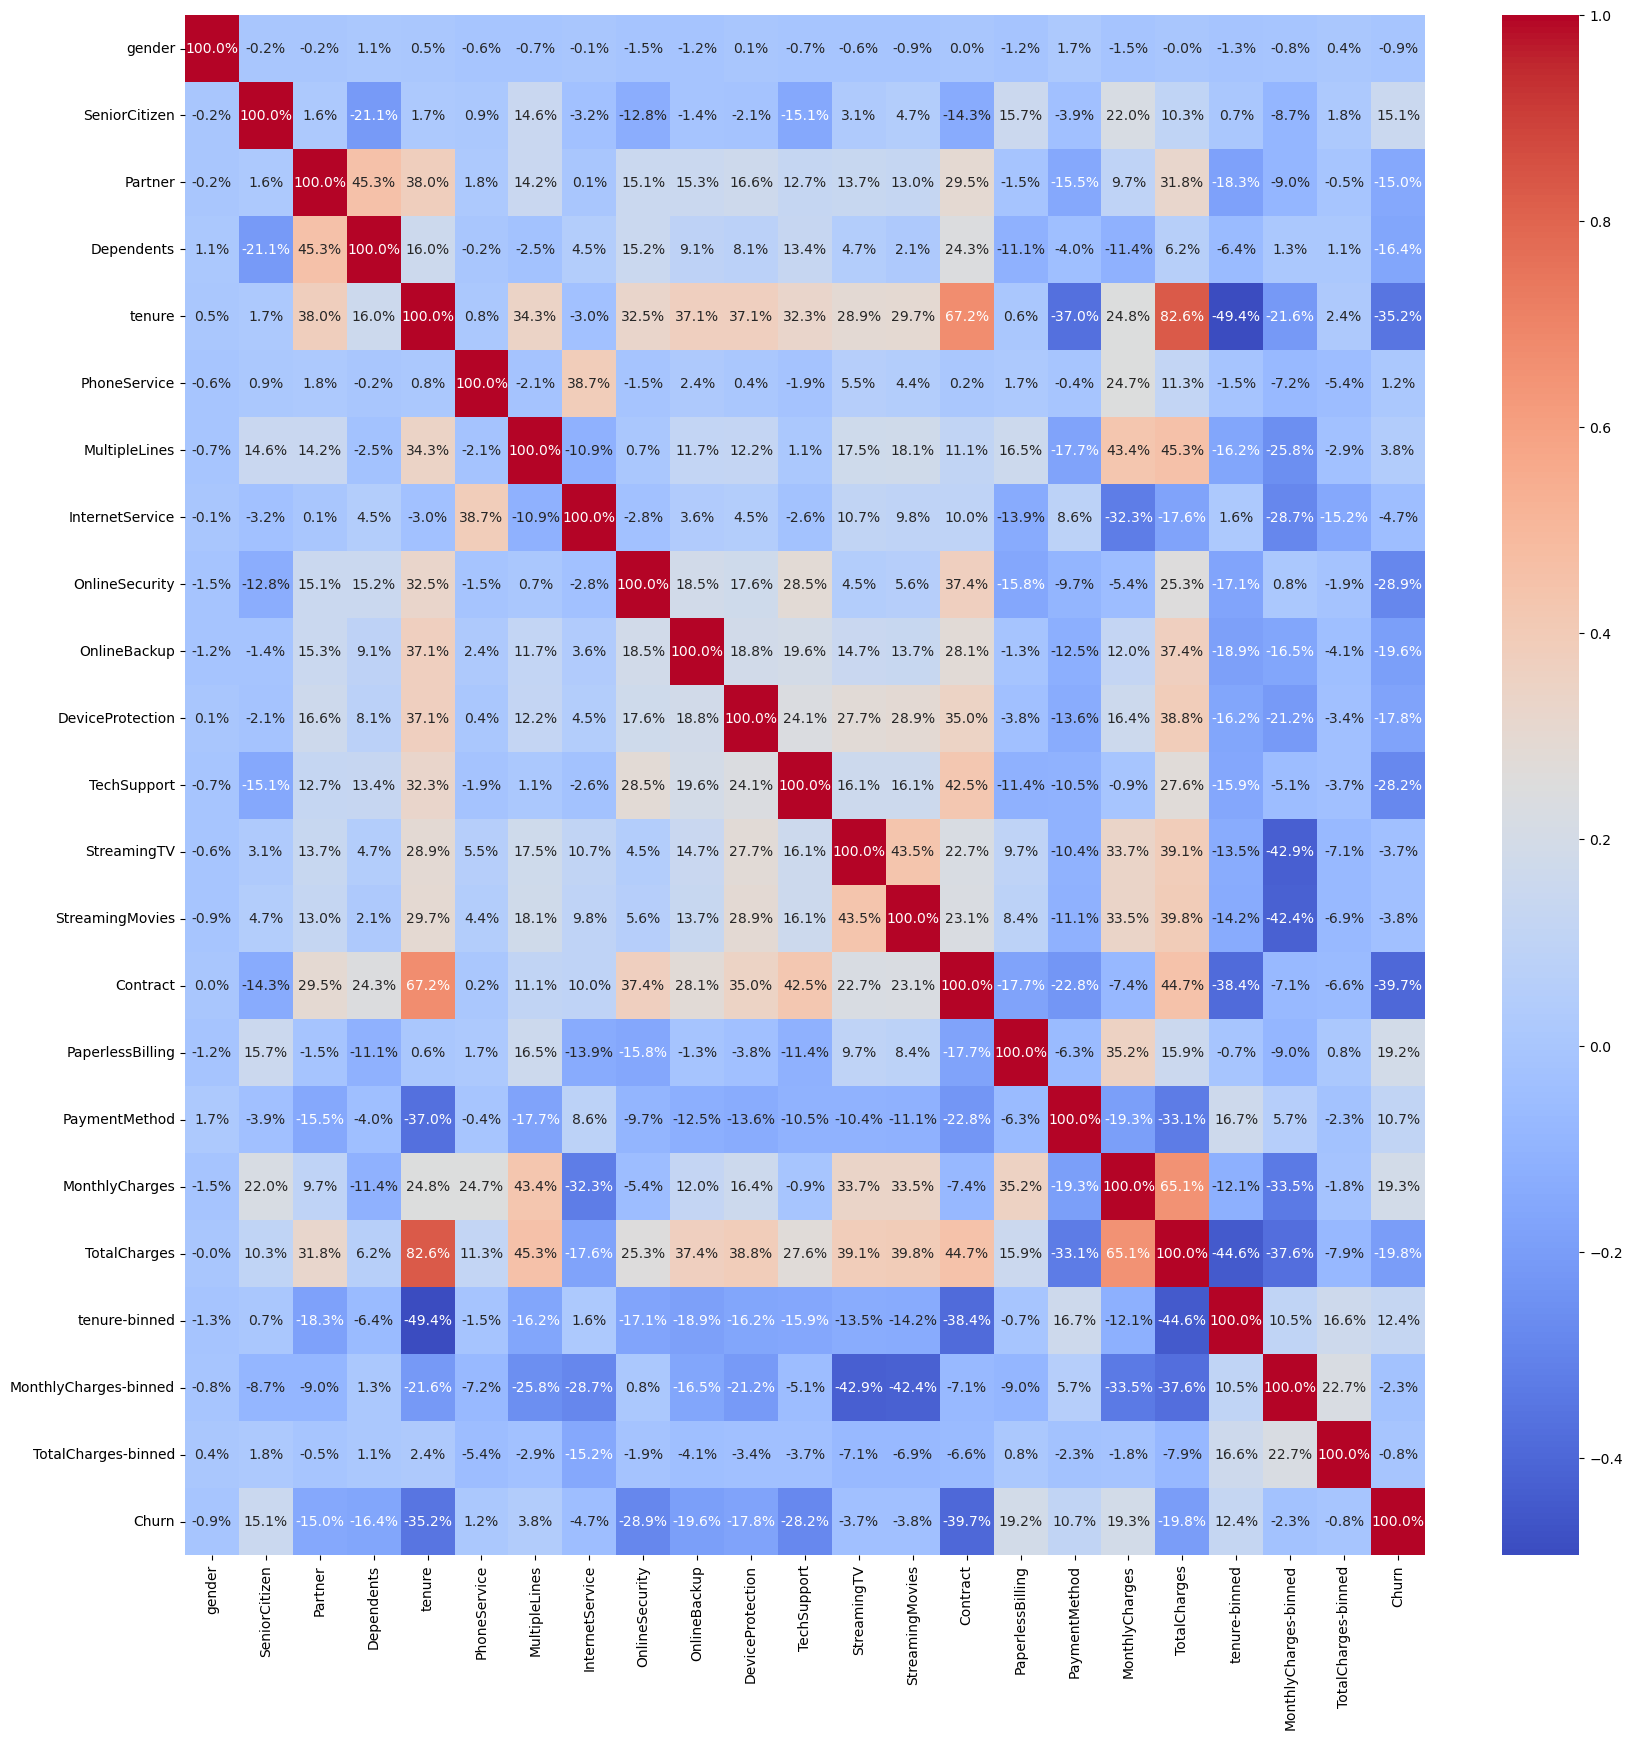

In [13]:
# plotting the correlation of the dataset using heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.1%')
plt.show()

* Tenure and TotalChaerges has highest correlation
* contract and tenure has median correlation
* online securtiy and phone service has lowest correlation

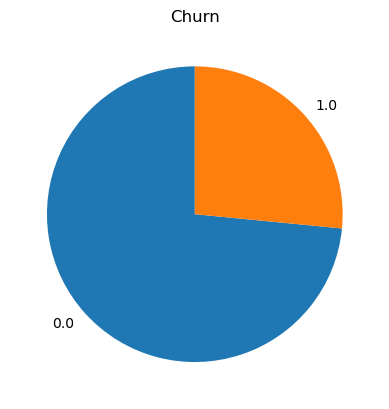

In [14]:
# plotting piechart
plt.pie(df['Churn'].value_counts(),labels=df['Churn'].value_counts().index,startangle=90)
plt.title("Churn")
plt.show()

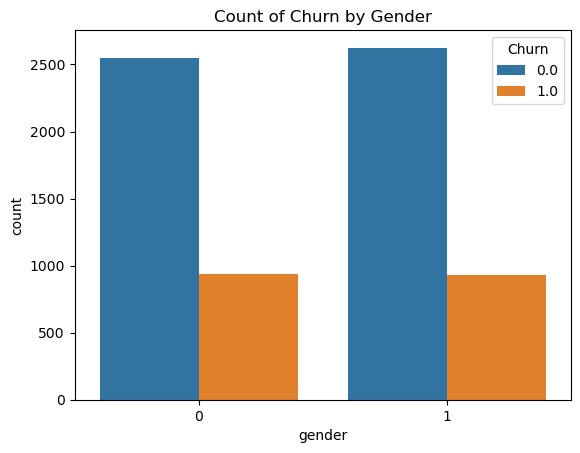

In [15]:
# plotting barplot
sns.countplot(data=df,x=df['gender'],hue=df['Churn'])
plt.title("Count of Churn by Gender")
plt.show()

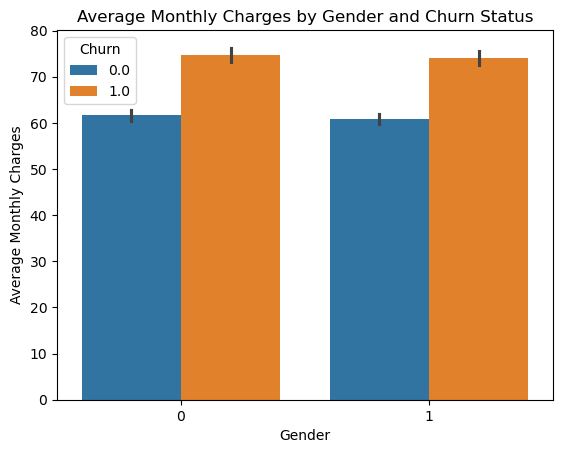

In [16]:
# another barplot
sns.barplot(data=df, x='gender', y='MonthlyCharges', hue='Churn')
plt.title('Average Monthly Charges by Gender and Churn Status')
plt.xlabel('Gender')
plt.ylabel('Average Monthly Charges')
plt.show()

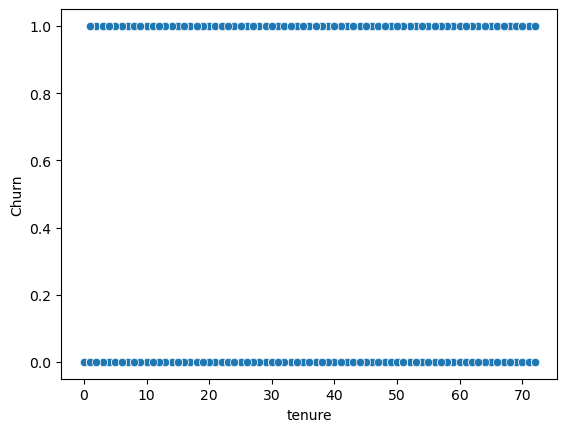

In [17]:
# plotting scatterplot
sns.scatterplot(data=df,x='tenure',y='Churn')
plt.show()

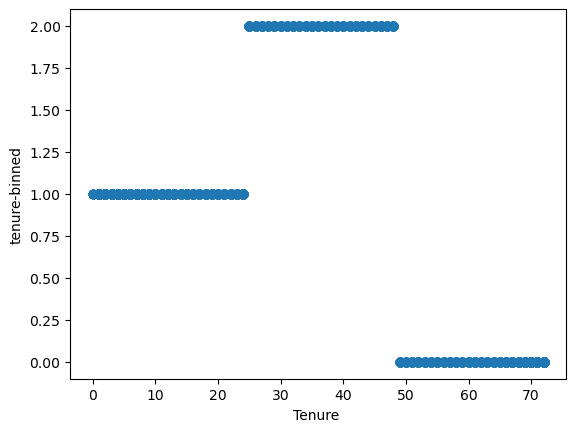

In [18]:
# another scatterplot
x = df['tenure'] 
y = df['tenure-binned'] 
plt.scatter(x,y)
plt.xlabel('Tenure ')
plt.ylabel('tenure-binned')
plt.show()

###  Training and Testing 

In [19]:
# training ,testing and spilting the dataset
from sklearn.model_selection import train_test_split
x=df.drop(['Churn'],axis=1)
y=df['Churn']
# spiltting the dataset
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
# shapes of xtrain,xtest,ytrain and ytest 
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((5634, 22), (1409, 22), (5634,), (1409,))

### Model Training and Evaluation

As this is a classification problem so we will be using these models :

* LogisticRegression
* DecisionTreeClassifier
* RandomForestClassifier
* GradientBoostingClassifier
* SVC(Support Vector Machine)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [21]:
scaler=StandardScaler()
xtrain_scal=scaler.fit_transform(xtrain)
xtest_scal=scaler.fit_transform(xtest)
scaler

StandardScaler()

In [22]:
le=LogisticRegression()
le.fit(xtrain_scal,ytrain)

LogisticRegression()

In [23]:
ypred=le.predict(xtest_scal)

In [24]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88      1036
         1.0       0.69      0.57      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [25]:
print(accuracy_score(ytest,ypred))

0.8176011355571328


In [26]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(xtrain_scal,ytrain)

DecisionTreeClassifier()

In [27]:
ypred1=dt.predict(xtest_scal)

In [28]:
print(classification_report(ytest,ypred1))
print("accuracy: ",accuracy_score(ytest,ypred1))

              precision    recall  f1-score   support

         0.0       0.79      0.82      0.81      1036
         1.0       0.45      0.40      0.43       373

    accuracy                           0.71      1409
   macro avg       0.62      0.61      0.62      1409
weighted avg       0.70      0.71      0.71      1409

accuracy:  0.7118523775727467


In [29]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(xtrain_scal,ytrain)

RandomForestClassifier()

In [30]:
ypred2=rf.predict(xtest_scal)

In [31]:
print(classification_report(ytest,ypred2))
print("Accuracy: ",accuracy_score(ytest,ypred2))

              precision    recall  f1-score   support

         0.0       0.81      0.92      0.87      1036
         1.0       0.66      0.41      0.51       373

    accuracy                           0.79      1409
   macro avg       0.74      0.67      0.69      1409
weighted avg       0.77      0.79      0.77      1409

Accuracy:  0.7885024840312278


In [32]:
from sklearn.ensemble import GradientBoostingClassifier
gd=GradientBoostingClassifier()
gd.fit(xtrain_scal,ytrain)

GradientBoostingClassifier()

In [33]:
ypred3=gd.predict(xtest_scal)

In [34]:
print(classification_report(ytest,ypred3))
print("Accuracy Score: ",accuracy_score(ytest,ypred3))

              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88      1036
         1.0       0.69      0.51      0.58       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409

Accuracy Score:  0.808374733853797


In [35]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(xtrain_scal,ytrain)

SVC()

In [36]:
ypred4=svc.predict(xtest_scal)

In [37]:
print(classification_report(ytest,ypred4))
print("Accuracy Score: ",accuracy_score(ytest,ypred4))

              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88      1036
         1.0       0.69      0.51      0.58       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409

Accuracy Score:  0.8090844570617459


## Conclusion

__Logistis regression__ is the best classification model  for this data